# Import libraries

In [1]:
#Load the required libraries
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Import data

We will download the data using the Yahoo API **`yfinance`**

In [2]:
# list of crptocurrencies as ticker arguments
cryptocurrencies = ['BNB-USD','BTC-USD', 'ETH-USD', 'XRP-USD', 'XTZ-USD', 'BCH-USD', 'BSV-USD', 'ADA-USD', 'EOS-USD', 'LTC-USD']

In [3]:
# Add the Dates to download the historic data
data = yf.download(cryptocurrencies, start='2019-01-01',
                end='2023-06-08')

data.head()

[*********************100%***********************]  10 of 10 completed


Adj Close                                                          \
             ADA-USD     BCH-USD   BNB-USD    BSV-USD      BTC-USD   EOS-USD   
Date                                                                           
2019-01-01  0.042547  164.854599  6.075273  92.142319  3843.520020  2.663533   
2019-01-02  0.045258  171.827377  6.188613  94.883766  3943.409424  2.887629   
2019-01-03  0.042682  162.049927  5.903535  88.643326  3836.741211  2.681411   
2019-01-04  0.043812  161.395630  6.065138  87.645248  3857.717529  2.721645   
2019-01-05  0.044701  160.401215  6.065543  88.520134  3845.194580  2.699468   

                                                       ...    Volume  \
               ETH-USD    LTC-USD   XRP-USD   XTZ-USD  ...   ADA-USD   
Date                                                   ...             
2019-01-01  140.819412  31.979931  0.364771  0.474699  ...  14962902   
2019-01-02  155.047684  33.433681  0.375243  0.485319  ...  24151526   
2019-01-03  149.135010  32.026699  0.360224  0.482134  ...  21126963   
2019-01-04  154.581940  32.404167  0.356747  0.483029  ...  16024029   
2019-01-05  155.638596  34.936867  0.355275  0.483224  ...  25100965   

                                                                               \
              BCH-USD   BNB-USD    BSV-USD     BTC-USD    EOS-USD     ETH-USD   
Date                                                                            
2019-01-01  267838686  23891162  108083721  4324200990  675099229  2258709868   
2019-01-02  270357561  30308610   94042085  5244856836  808413256  3328240369   
2019-01-03  231676176  22821639   75308623  4530215219  636865311  2676164880   
2019-01-04  207663255  29311136   66629980  4847965467  723318560  3126192535   
2019-01-05  230320255  30340637   66121035  5137609824  750751760  3338211928   

                                           
              LTC-USD    XRP-USD  XTZ-USD  
Date                                       
2019-01-01  379429124  449347622   714132  
2019-01-02  414331918  543216669  3754443  
2019-01-03  345068249  438873803  3296793  
2019-01-04  391010579  450633876  3284328  
2019-01-05  640607603  452090239  3193352  

[5 rows x 60 columns]

Features description:
- **Date**: Date of the trade
- **Open**: The price at which the stock began
- **High**: Highest price during that trading day
- **Low**: Lowest price during that trading day
- **Close**: The price at which the stock ended
- **Adj Close**: The closing price after adjustments for splits, right offeruings and dividends, to make prices comparable over time
- **Volume**: Total stocks traded that day

# EDA

## Missing data

In [4]:
# check for missing data
data.isnull().any()

Adj Close  ADA-USD    False
           BCH-USD    False
           BNB-USD    False
           BSV-USD    False
           BTC-USD    False
           EOS-USD    False
           ETH-USD    False
           LTC-USD    False
           XRP-USD    False
           XTZ-USD    False
Close      ADA-USD    False
           BCH-USD    False
           BNB-USD    False
           BSV-USD    False
           BTC-USD    False
           EOS-USD    False
           ETH-USD    False
           LTC-USD    False
           XRP-USD    False
           XTZ-USD    False
High       ADA-USD    False
           BCH-USD    False
           BNB-USD    False
           BSV-USD    False
           BTC-USD    False
           EOS-USD    False
           ETH-USD    False
           LTC-USD    False
           XRP-USD    False
           XTZ-USD    False
Low        ADA-USD    False
           BCH-USD    False
           BNB-USD    False
           BSV-USD    False
           BTC-USD    False
           EOS-USD  

In [5]:
# print rows with  missing data
data[data.isna().any(axis=1)]

Empty DataFrame
Columns: [(Adj Close, ADA-USD), (Adj Close, BCH-USD), (Adj Close, BNB-USD), (Adj Close, BSV-USD), (Adj Close, BTC-USD), (Adj Close, EOS-USD), (Adj Close, ETH-USD), (Adj Close, LTC-USD), (Adj Close, XRP-USD), (Adj Close, XTZ-USD), (Close, ADA-USD), (Close, BCH-USD), (Close, BNB-USD), (Close, BSV-USD), (Close, BTC-USD), (Close, EOS-USD), (Close, ETH-USD), (Close, LTC-USD), (Close, XRP-USD), (Close, XTZ-USD), (High, ADA-USD), (High, BCH-USD), (High, BNB-USD), (High, BSV-USD), (High, BTC-USD), (High, EOS-USD), (High, ETH-USD), (High, LTC-USD), (High, XRP-USD), (High, XTZ-USD), (Low, ADA-USD), (Low, BCH-USD), (Low, BNB-USD), (Low, BSV-USD), (Low, BTC-USD), (Low, EOS-USD), (Low, ETH-USD), (Low, LTC-USD), (Low, XRP-USD), (Low, XTZ-USD), (Open, ADA-USD), (Open, BCH-USD), (Open, BNB-USD), (Open, BSV-USD), (Open, BTC-USD), (Open, EOS-USD), (Open, ETH-USD), (Open, LTC-USD), (Open, XRP-USD), (Open, XTZ-USD), (Volume, ADA-USD), (Volume, BCH-USD), (Volume, BNB-USD), (Volume, BSV-USD), (Volume, BTC-USD), (Volume, EOS-USD), (Volume, ETH-USD), (Volume, LTC-USD), (Volume, XRP-USD), (Volume, XTZ-USD)]
Index: []

[0 rows x 60 columns]

## Adjusted closing price

Our target is **adjusted closing price**

In [6]:
adj_close=data['Adj Close']
adj_close.head()

,ADA-USD,BCH-USD,BNB-USD,BSV-USD,BTC-USD,EOS-USD,ETH-USD,LTC-USD,XRP-USD,XTZ-USD
Date,,,,,,,,,,
2019-01-01,0.042547,164.854599,6.075273,92.142319,3843.520020,2.663533,140.819412,31.979931,0.364771,0.474699
2019-01-02,0.045258,171.827377,6.188613,94.883766,3943.409424,2.887629,155.047684,33.433681,0.375243,0.485319
2019-01-03,0.042682,162.049927,5.903535,88.643326,3836.741211,2.681411,149.135010,32.026699,0.360224,0.482134
2019-01-04,0.043812,161.395630,6.065138,87.645248,3857.717529,2.721645,154.581940,32.404167,0.356747,0.483029
2019-01-05,0.044701,160.401215,6.065543,88.520134,3845.194580,2.699468,155.638596,34.936867,0.355275,0.483224


### Time series

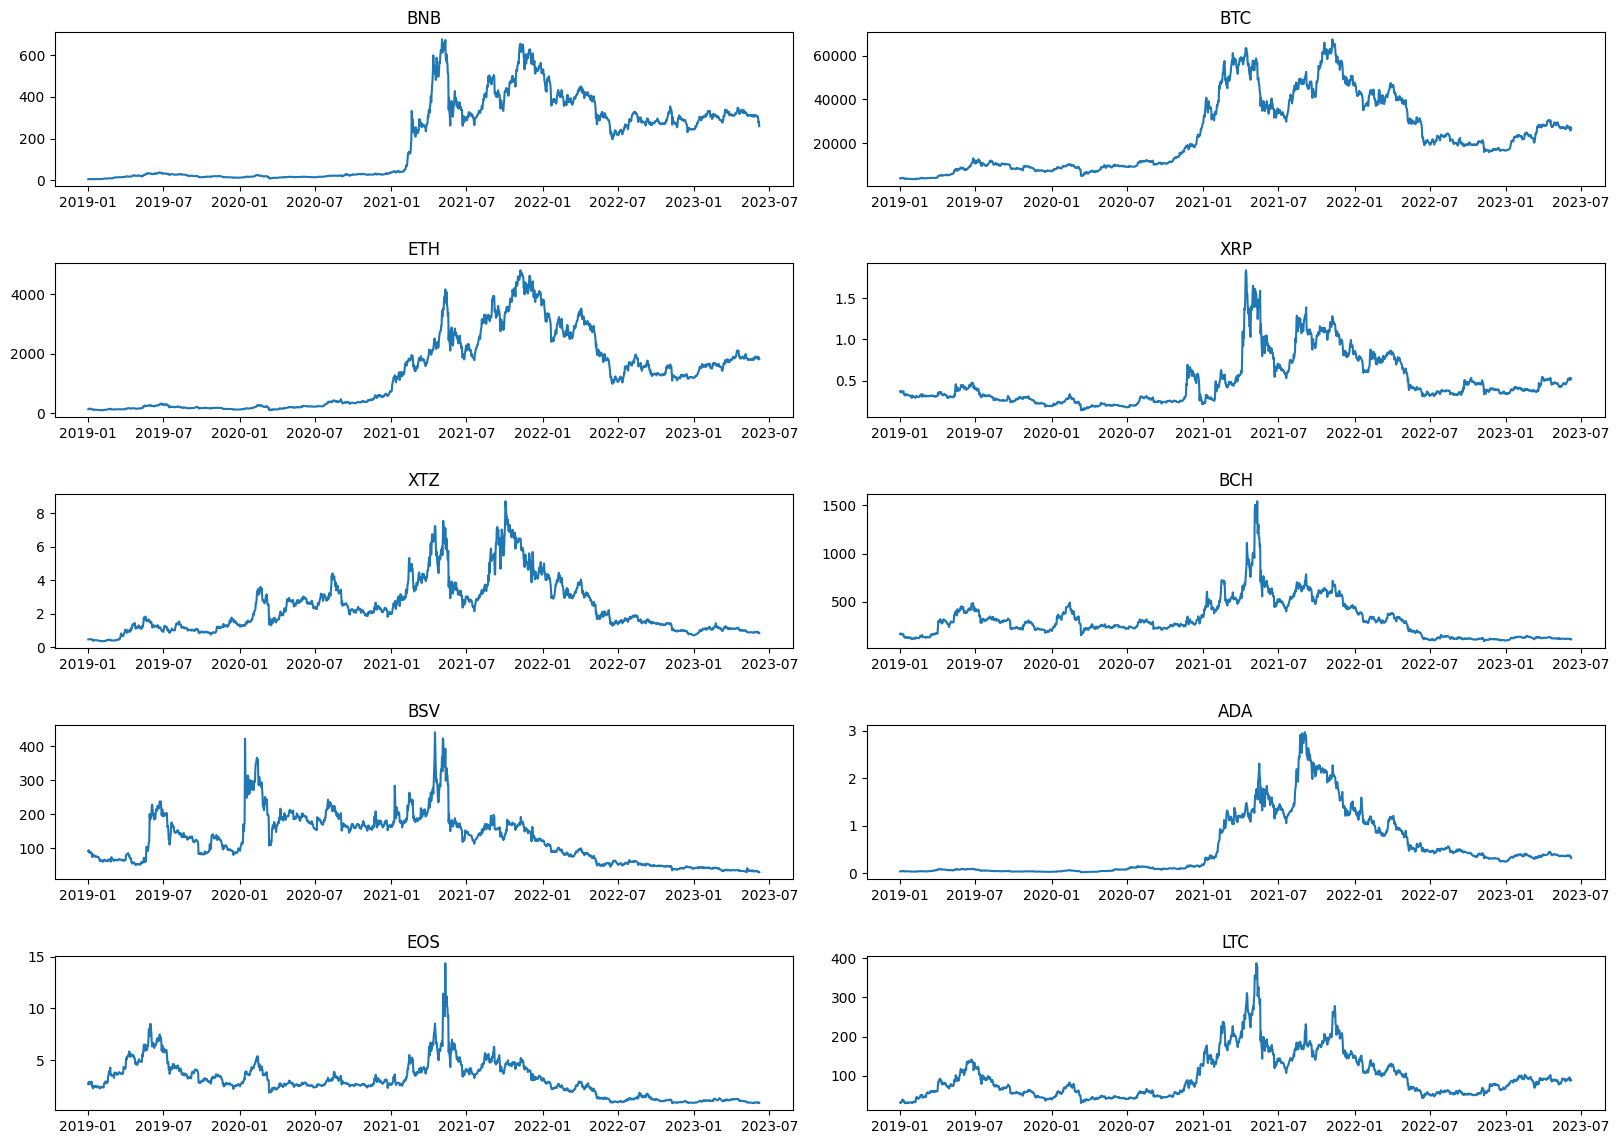

In [7]:
# ploting the adjusted closing price with subplots
fig, axs =plt.subplots(5,2,figsize=(20,14),gridspec_kw ={'hspace': 0.5, 'wspace': 0.1})

axs[0,0].plot(adj_close['BNB-USD'])
axs[0,0].set_title('BNB')

axs[0,1].plot(adj_close['BTC-USD'])
axs[0,1].set_title('BTC')

axs[1,0].plot(adj_close['ETH-USD'])
axs[1,0].set_title('ETH')

axs[1,1].plot(adj_close['XRP-USD'])
axs[1,1].set_title('XRP')

axs[2,0].plot(adj_close['XTZ-USD'])
axs[2,0].set_title('XTZ')

axs[2,1].plot(adj_close['BCH-USD'])
axs[2,1].set_title('BCH')

axs[3,0].plot(adj_close['BSV-USD'])
axs[3,0].set_title('BSV')

axs[3,1].plot(adj_close['ADA-USD'])
axs[3,1].set_title('ADA')

axs[4,0].plot(adj_close['EOS-USD'])
axs[4,0].set_title('EOS')

axs[4,1].plot(adj_close['LTC-USD'])
axs[4,1].set_title('LTC')



plt.show()

### Return Series

A return, also known as a financial return, in its simplest terms, is the money made or lost on an investment over some period of time.

A return is a change in the price of an asset over time.

Returns can be positive, representing a profit, or negative, indicating a loss. Return series of an asset are easier to handle than price series and give a complete summary of the investment opportunity.

We will use the pandas **`pct_change()`** function to compute the returns.

These are relative price changes of the cryptocurrencies

In [8]:
# Returns i.e. percentage change in the adjusted close price and drop the first row with NA's
returns = adj_close.pct_change().dropna(axis=0)

#view the first 5 rows of the data frame
returns.head()

,ADA-USD,BCH-USD,BNB-USD,BSV-USD,BTC-USD,EOS-USD,ETH-USD,LTC-USD,XRP-USD,XTZ-USD
Date,,,,,,,,,,
2019-01-02,0.063718,0.042297,0.018656,0.029752,0.025989,0.084135,0.101039,0.045458,0.028708,0.022372
2019-01-03,-0.056918,-0.056903,-0.046065,-0.065769,-0.027050,-0.071414,-0.038135,-0.042083,-0.040025,-0.006563
2019-01-04,0.026475,-0.004038,0.027374,-0.011259,0.005467,0.015005,0.036523,0.011786,-0.009652,0.001856
2019-01-05,0.020291,-0.006161,0.000067,0.009982,-0.003246,-0.008148,0.006836,0.078160,-0.004126,0.000404
2019-01-06,0.102011,0.040149,0.054478,0.020962,0.060189,0.065125,0.013542,0.124853,0.036929,0.002305


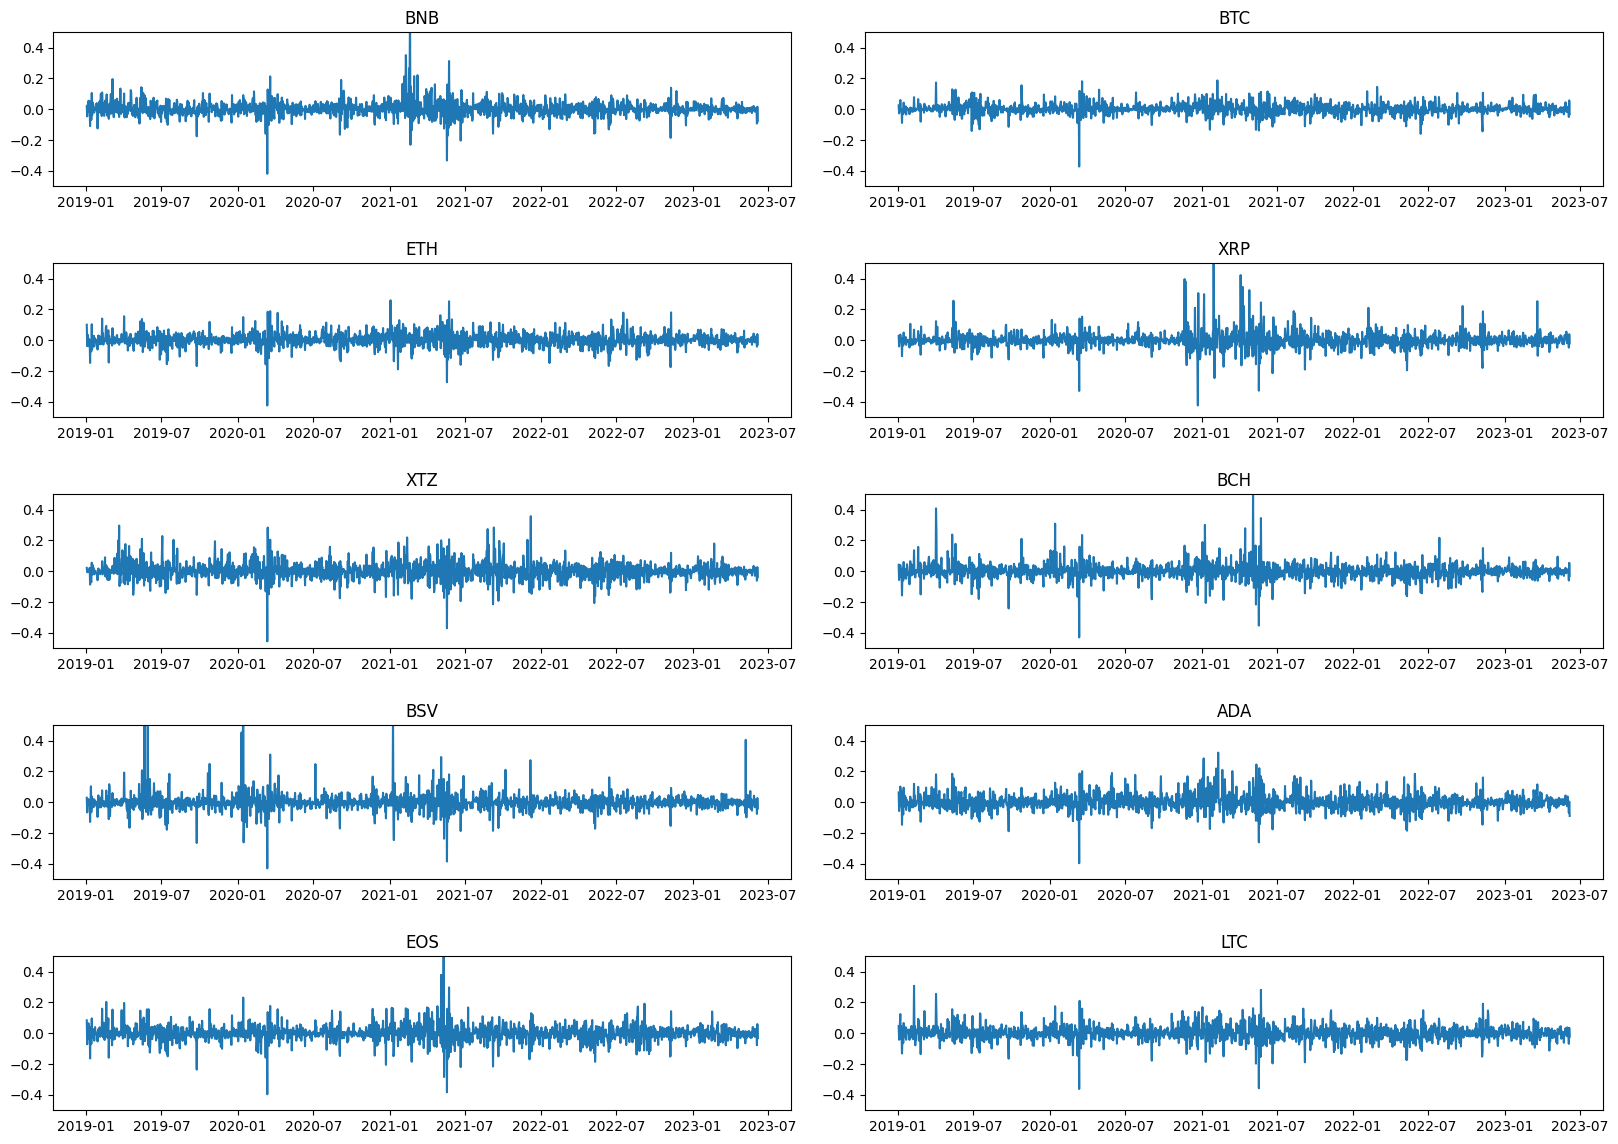

In [9]:
#ploting the returns in subplots
fig, axs = plt.subplots(5,2,figsize=(20,14),gridspec_kw ={'hspace': 0.5, 'wspace': 0.1})

axs[0,0].plot(returns['BNB-USD'])
axs[0,0].set_title('BNB')
axs[0,0].set_ylim([-0.5,0.5])

axs[0,1].plot(returns['BTC-USD'])
axs[0,1].set_title('BTC')
axs[0,1].set_ylim([-0.5,0.5])

axs[1,0].plot(returns['ETH-USD'])
axs[1,0].set_title('ETH')
axs[1,0].set_ylim([-0.5,0.5])

axs[1,1].plot(returns['XRP-USD'])
axs[1,1].set_title('XRP')
axs[1,1].set_ylim([-0.5,0.5])

axs[2,0].plot(returns['XTZ-USD'])
axs[2,0].set_title('XTZ')
axs[2,0].set_ylim([-0.5,0.5])

axs[2,1].plot(returns['BCH-USD'])
axs[2,1].set_title('BCH')
axs[2,1].set_ylim([-0.5,0.5])

axs[3,0].plot(returns['BSV-USD'])
axs[3,0].set_title('BSV')
axs[3,0].set_ylim([-0.5,0.5])

axs[3,1].plot(returns['ADA-USD'])
axs[3,1].set_title('ADA')
axs[3,1].set_ylim([-0.5,0.5])

axs[4,0].plot(returns['EOS-USD'])
axs[4,0].set_title('EOS')
axs[4,0].set_ylim([-0.5,0.5])

axs[4,1].plot(returns['LTC-USD'])
axs[4,1].set_title('LTC')
axs[4,1].set_ylim([-0.5,0.5])


plt.show()

BSV is the most volatile, while Bitcoin is the least volatile.

For all the cryptocurrencies, we can see a huge crash around March of 2020 and also another crash in November 2022 after the crypto exchange FTX collapsed

### Volatilty

Volatility is a measure of change in the price of an asset over time. The higher the standard deviation, the more volatile an asset is.

In [10]:
#volatility, standard deviation of the returns
returns.std().to_frame()

,0
ADA-USD,0.054167
BCH-USD,0.054108
BNB-USD,0.051756
BSV-USD,0.070314
BTC-USD,0.036416
EOS-USD,0.056507
ETH-USD,0.046658
LTC-USD,0.050331
XRP-USD,0.056109
XTZ-USD,0.059891


BSV is the most volatile of the four assets, while Bitcoin is the least volatile.

### Histogram

This displays the frequency and distribution of every return.

- Positive return: won money

- Negative return: lost money

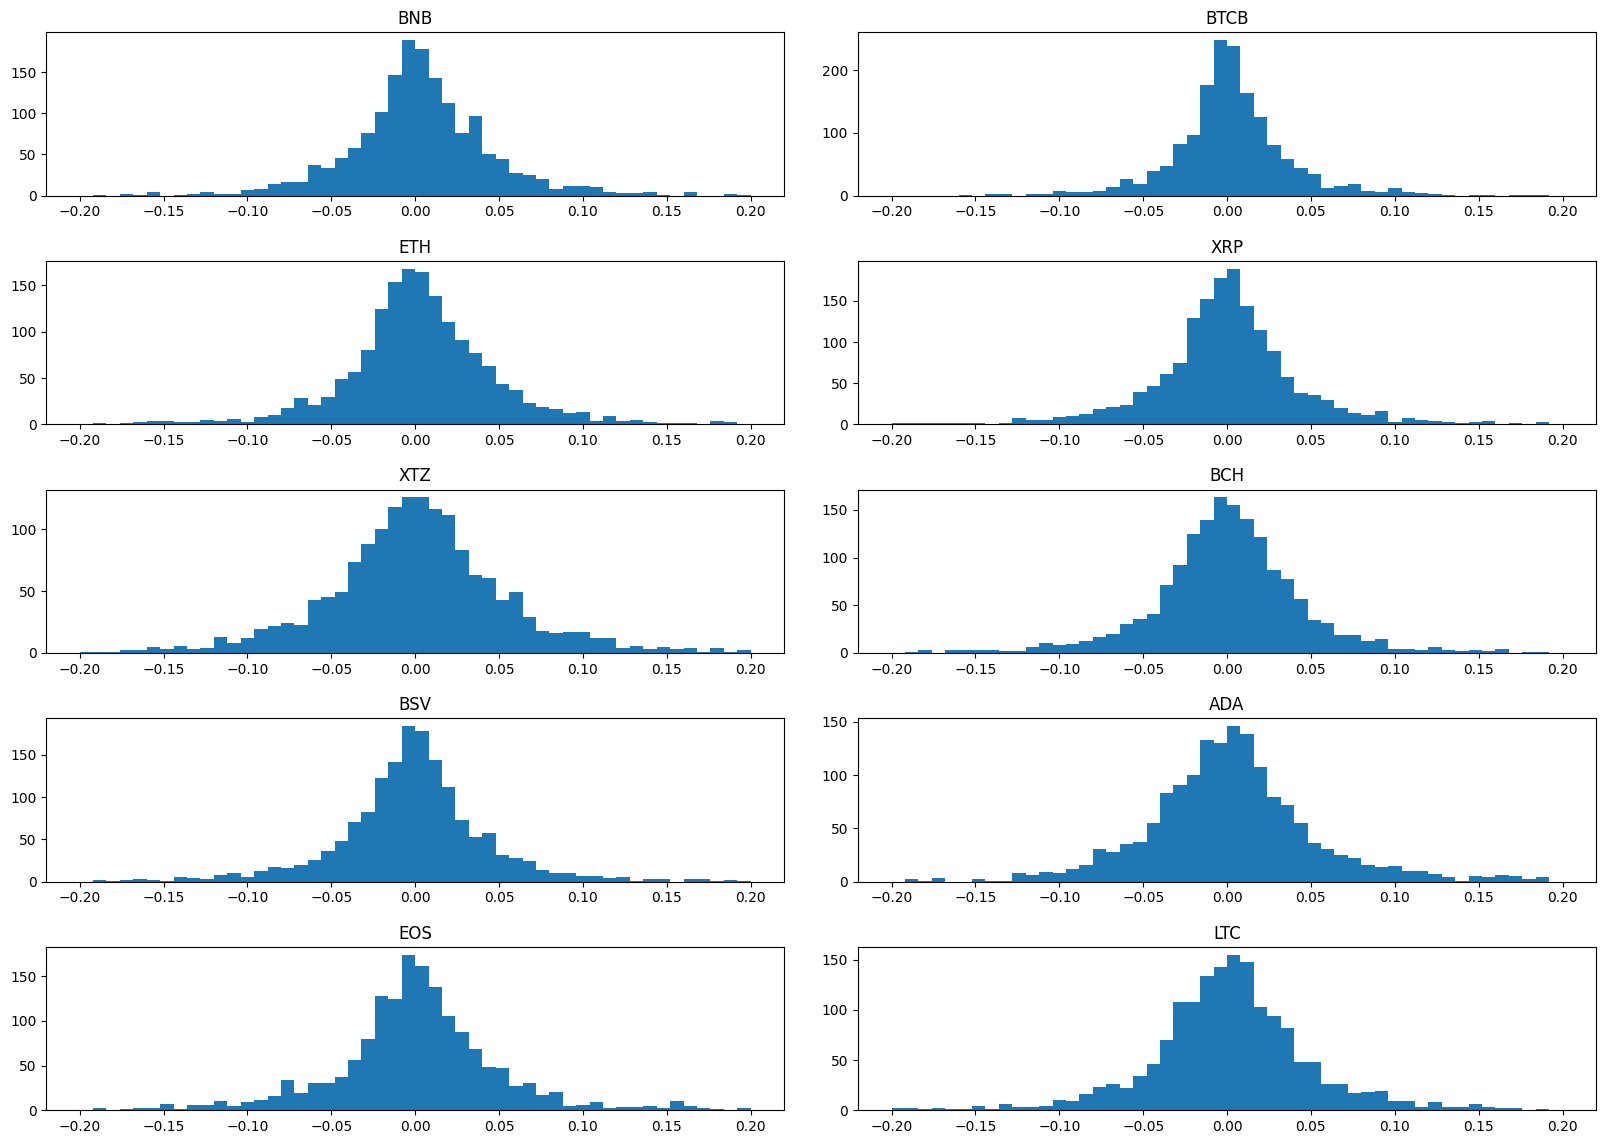

In [11]:
#ploting the histogram in subplots
fig, axs = plt.subplots(5,2,figsize=(20,14),gridspec_kw ={'hspace': 0.4, 'wspace': 0.1})

axs[0,0].hist(returns['BNB-USD'], bins=50, range=(-0.2, 0.2))
axs[0,0].set_title('BNB')

axs[0,1].hist(returns['BTC-USD'], bins=50, range=(-0.2, 0.2))
axs[0,1].set_title('BTCB')

axs[1,0].hist(returns['ETH-USD'], bins=50, range=(-0.2, 0.2))
axs[1,0].set_title('ETH')

axs[1,1].hist(returns['XRP-USD'], bins=50, range=(-0.2, 0.2))
axs[1,1].set_title('XRP')

axs[2,0].hist(returns['XTZ-USD'], bins=50, range=(-0.2, 0.2))
axs[2,0].set_title('XTZ')

axs[2,1].hist(returns['BCH-USD'], bins=50, range=(-0.2, 0.2))
axs[2,1].set_title('BCH')

axs[3,0].hist(returns['BSV-USD'], bins=50, range=(-0.2, 0.2))
axs[3,0].set_title('BSV')

axs[3,1].hist(returns['ADA-USD'], bins=50, range=(-0.2, 0.2))
axs[3,1].set_title('ADA')

axs[4,0].hist(returns['EOS-USD'], bins=50, range=(-0.2, 0.2))
axs[4,0].set_title('EOS')

axs[4,1].hist(returns['LTC-USD'], bins=50, range=(-0.2, 0.2))
axs[4,1].set_title('LTC')


plt.show()

### Cumulative Returns

Cumulative return express the total change in the price of an asset over time.

We use the pandas **`cumprod()`** function to calculate the daily cumulative simple returns.

In [12]:
# Cumulative return series
cum_returns = ((1 + returns).cumprod() - 1)*100
cum_returns.head()

,ADA-USD,BCH-USD,BNB-USD,BSV-USD,BTC-USD,EOS-USD,ETH-USD,LTC-USD,XRP-USD,XTZ-USD
Date,,,,,,,,,,
2019-01-02,6.371781,4.229654,1.865594,2.975232,2.598904,8.413489,10.103913,4.545822,2.870842,2.237207
2019-01-03,0.317298,-1.701301,-2.826838,-3.797379,-0.176370,0.671216,5.905150,0.146242,-1.246535,1.566261
2019-01-04,2.973184,-2.098194,-0.166827,-4.880570,0.369388,2.181769,9.773175,1.326570,-2.199738,1.754800
2019-01-05,5.062637,-2.701401,-0.160155,-3.931076,0.043568,1.349145,10.523537,9.246223,-2.603278,1.795878
2019-01-06,15.780200,1.205054,5.278872,-1.917270,6.065080,7.949557,12.020209,22.885991,0.993498,2.030549


In [13]:
# This will help understand the plot below as it helps to identify the colors by value
cum_returns[cum_returns.index == "2021-10-01"]

,ADA-USD,BCH-USD,BNB-USD,BSV-USD,BTC-USD,EOS-USD,ETH-USD,LTC-USD,XRP-USD,XTZ-USD
Date,,,,,,,,,,
2021-10-01,5207.370773,229.564803,6840.316689,51.582567,1151.89777,60.476785,2248.764322,419.488934,185.829732,1311.195991


Text(0.5, 1.0, 'Cumulative Returns')

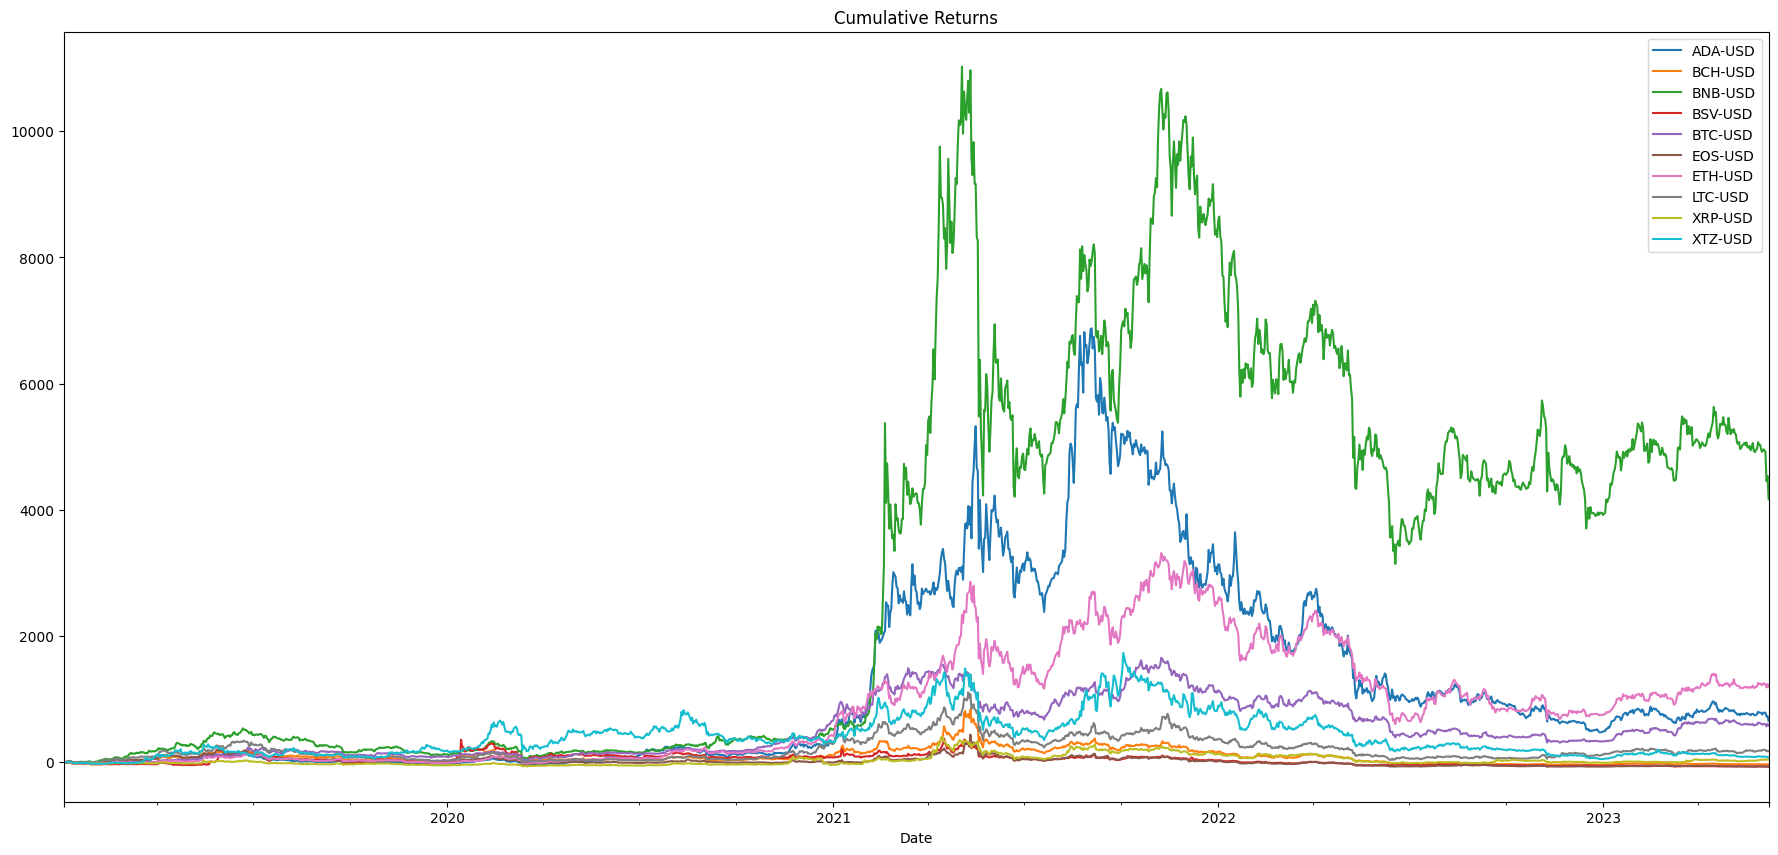

In [14]:
# Plotting the cumulative retuns for each crypto currency
cum_returns.plot(figsize=(22,10))
plt.title('Cumulative Returns')


Binance, ADA and Ethereum outperforms other currencies from March of 2021, but from June 2022 only Binance outperforms

### Correlation

Correlation is the degree in which asset prices move together (positive correlation) or against each other (negative correlation). The exact measurement is referred to as the correlation coefficient and always falls between a negative and positive spectrum of -1.0 to +1.0. Coefficients close to zero indicate no correlation.

We’ll show the correlation on returns since correlation on raw price data can give biased results.

In [15]:
#compute the correlations
returns.corr()

,ADA-USD,BCH-USD,BNB-USD,BSV-USD,BTC-USD,EOS-USD,ETH-USD,LTC-USD,XRP-USD,XTZ-USD
ADA-USD,1.000000,0.684670,0.604401,0.471417,0.675278,0.695928,0.741951,0.716707,0.603435,0.625201
BCH-USD,0.684670,1.000000,0.606319,0.689907,0.758172,0.815516,0.775951,0.819516,0.631235,0.624483
BNB-USD,0.604401,0.606319,1.000000,0.453141,0.651784,0.622572,0.680428,0.652587,0.530387,0.576295
BSV-USD,0.471417,0.689907,0.453141,1.000000,0.523193,0.609125,0.551041,0.583499,0.448871,0.456545
BTC-USD,0.675278,0.758172,0.651784,0.523193,1.000000,0.700744,0.821248,0.782043,0.585951,0.614653
EOS-USD,0.695928,0.815516,0.622572,0.609125,0.700744,1.000000,0.750012,0.784623,0.669415,0.658961
ETH-USD,0.741951,0.775951,0.680428,0.551041,0.821248,0.750012,1.000000,0.813069,0.633793,0.672868
LTC-USD,0.716707,0.819516,0.652587,0.583499,0.782043,0.784623,0.813069,1.000000,0.643616,0.635974
XRP-USD,0.603435,0.631235,0.530387,0.448871,0.585951,0.669415,0.633793,0.643616,1.000000,0.573044
XTZ-USD,0.625201,0.624483,0.576295,0.456545,0.614653,0.658961,0.672868,0.635974,0.573044,1.000000


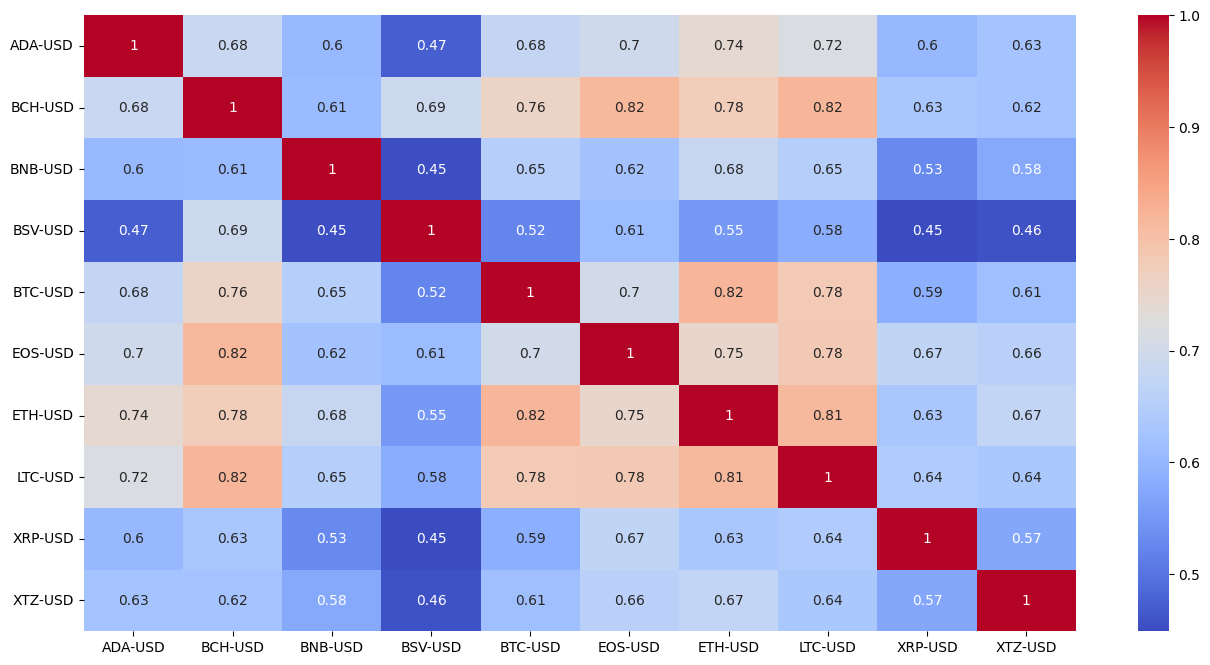

In [16]:
#plot the correlations
plt.figure(figsize=(16,8))

sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.show()

From the heatmap, we can see that Bitcoin Cash (BCH) and Ethereum, EOS and Litecoin(LTC) are highly correlated.Also Bitcoin (BTC) is hightly correlated with Bitcoin Cash (BCH), Ethereum and Litecoin(LTC)

That means for example that when Bitcoin Cash goes up, Ethereum also goes up, and when Bitcoin falls, Ethereum also falls.

On the othe hand, BSV is less correlated to BNB and XRP


### Moving Average

Moving average (rolling average) is used to smooth out "noise", which are random short-term fluctuations in price, to identify long-term trends or cycles. For example, a 7-day moving average reflects short-term trends in the stock market, whereas a 100-day rolling average indicates major trends in the stock market.

Here we calculate the **arithmetic mean** of a given set of prices over a specified period.

In [17]:
# compute a short-term 20-day moving average
MA20 = adj_close.rolling(20).mean()

# compute a Long-term 50-day moving average
MA50 = adj_close.rolling(100).mean()

# compute a Long-term 100-day moving average
MA100 = adj_close.rolling(100).mean()

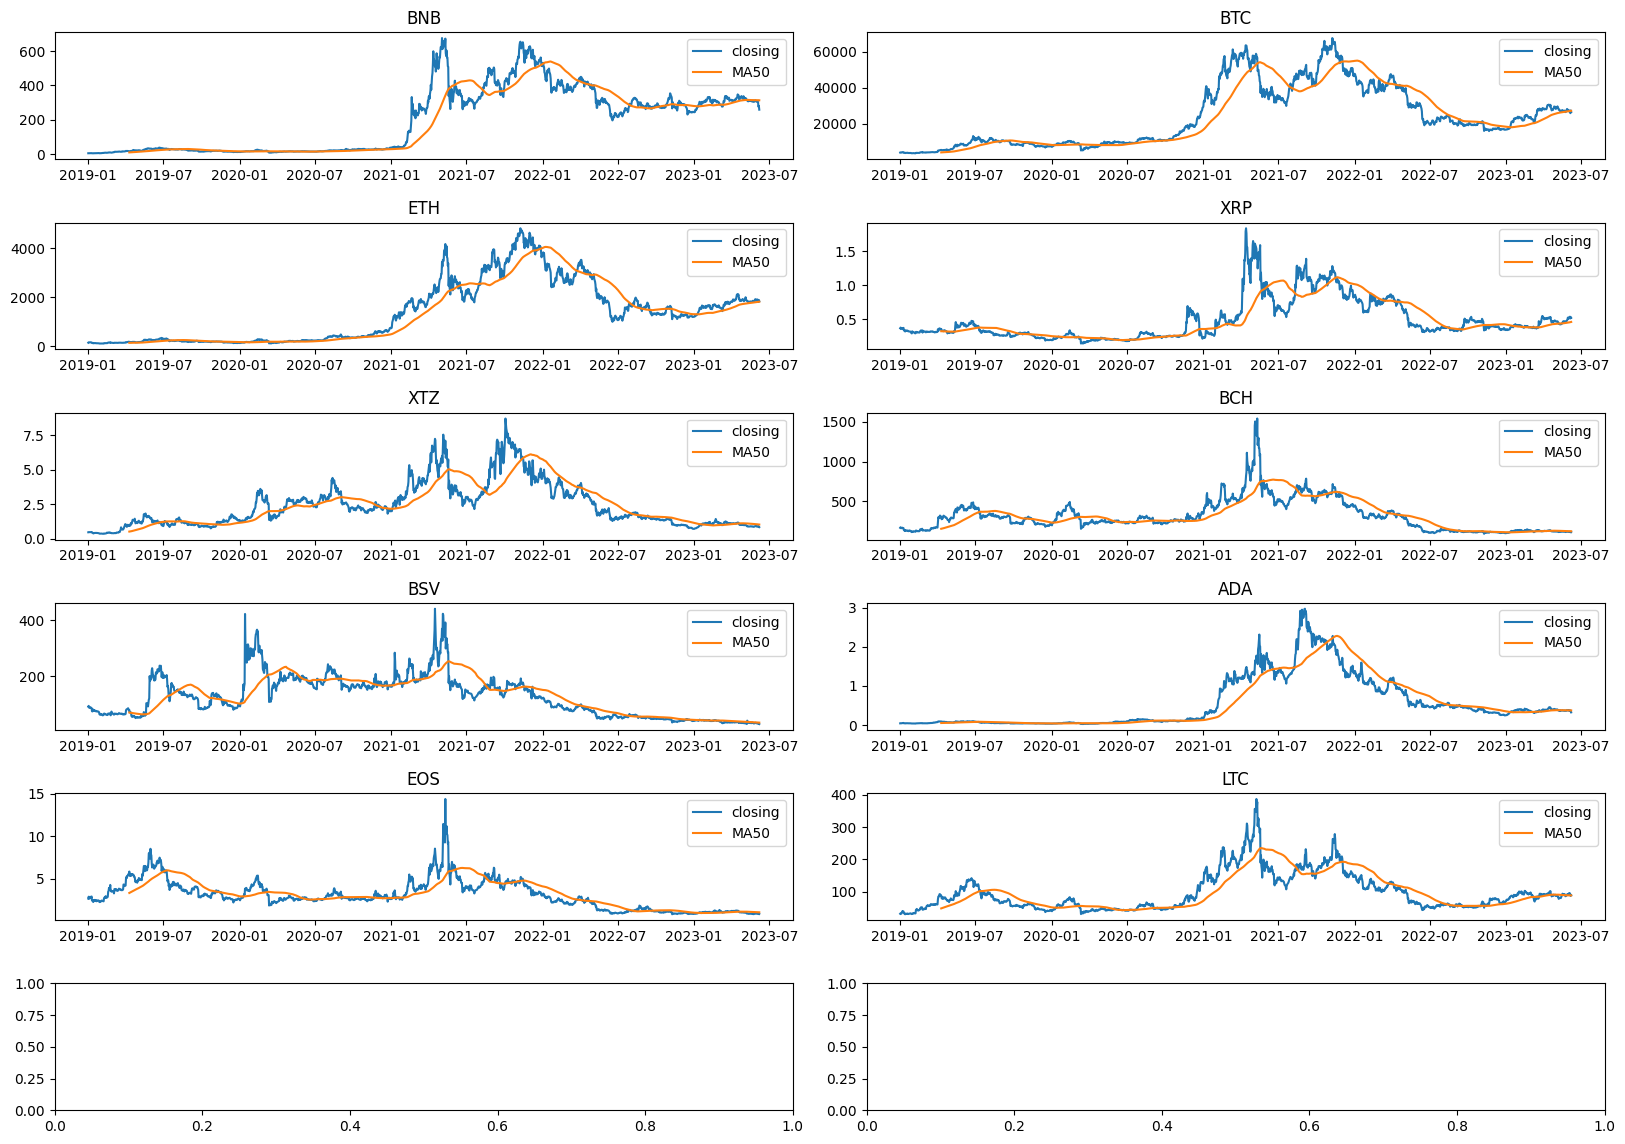

In [18]:
# ploting the 50-day moving average
fig, axs = plt.subplots(6,2,figsize=(20,14),gridspec_kw ={'hspace': 0.5, 'wspace': 0.1})

axs[0,0].plot(adj_close['BNB-USD'], label= 'closing')
axs[0,0].plot(MA50['BNB-USD'], label= 'MA50')
axs[0,0].set_title('BNB')
axs[0,0].legend()

axs[0,1].plot(adj_close['BTC-USD'], label= 'closing')
axs[0,1].plot(MA50['BTC-USD'], label= 'MA50')
axs[0,1].set_title('BTC')
axs[0,1].legend()

axs[1,0].plot(adj_close['ETH-USD'], label= 'closing')
axs[1,0].plot(MA50['ETH-USD'], label= 'MA50')
axs[1,0].set_title('ETH')
axs[1,0].legend()

axs[1,1].plot(adj_close['XRP-USD'], label= 'closing')
axs[1,1].plot(MA50['XRP-USD'], label= 'MA50')
axs[1,1].set_title('XRP')
axs[1,1].legend()

axs[2,0].plot(adj_close['XTZ-USD'], label= 'closing')
axs[2,0].plot(MA50['XTZ-USD'], label= 'MA50')
axs[2,0].set_title('XTZ')
axs[2,0].legend()


axs[2,1].plot(adj_close['BCH-USD'], label= 'closing')
axs[2,1].plot(MA50['BCH-USD'], label= 'MA50')
axs[2,1].set_title('BCH')
axs[2,1].legend()

axs[3,0].plot(adj_close['BSV-USD'], label= 'closing')
axs[3,0].plot(MA50['BSV-USD'], label= 'MA50')
axs[3,0].set_title('BSV')
axs[3,0].legend()

axs[3,1].plot(adj_close['ADA-USD'], label= 'closing')
axs[3,1].plot(MA50['ADA-USD'], label= 'MA50')
axs[3,1].set_title('ADA')
axs[3,1].legend()

axs[4,0].plot(adj_close['EOS-USD'], label= 'closing')
axs[4,0].plot(MA50['EOS-USD'], label= 'MA50')
axs[4,0].set_title('EOS')
axs[4,0].legend()

axs[4,1].plot(adj_close['LTC-USD'], label= 'closing')
axs[4,1].plot(MA50['LTC-USD'], label= 'MA50')
axs[4,1].set_title('LTC')
axs[4,1].legend()


plt.show()

We can observe from the chart that in May of 2021, the price crosses below the 50-day MA, which indicates a **downward trend**, and in August 2021, the price crosses above the MA, which shows an **upward trend**.

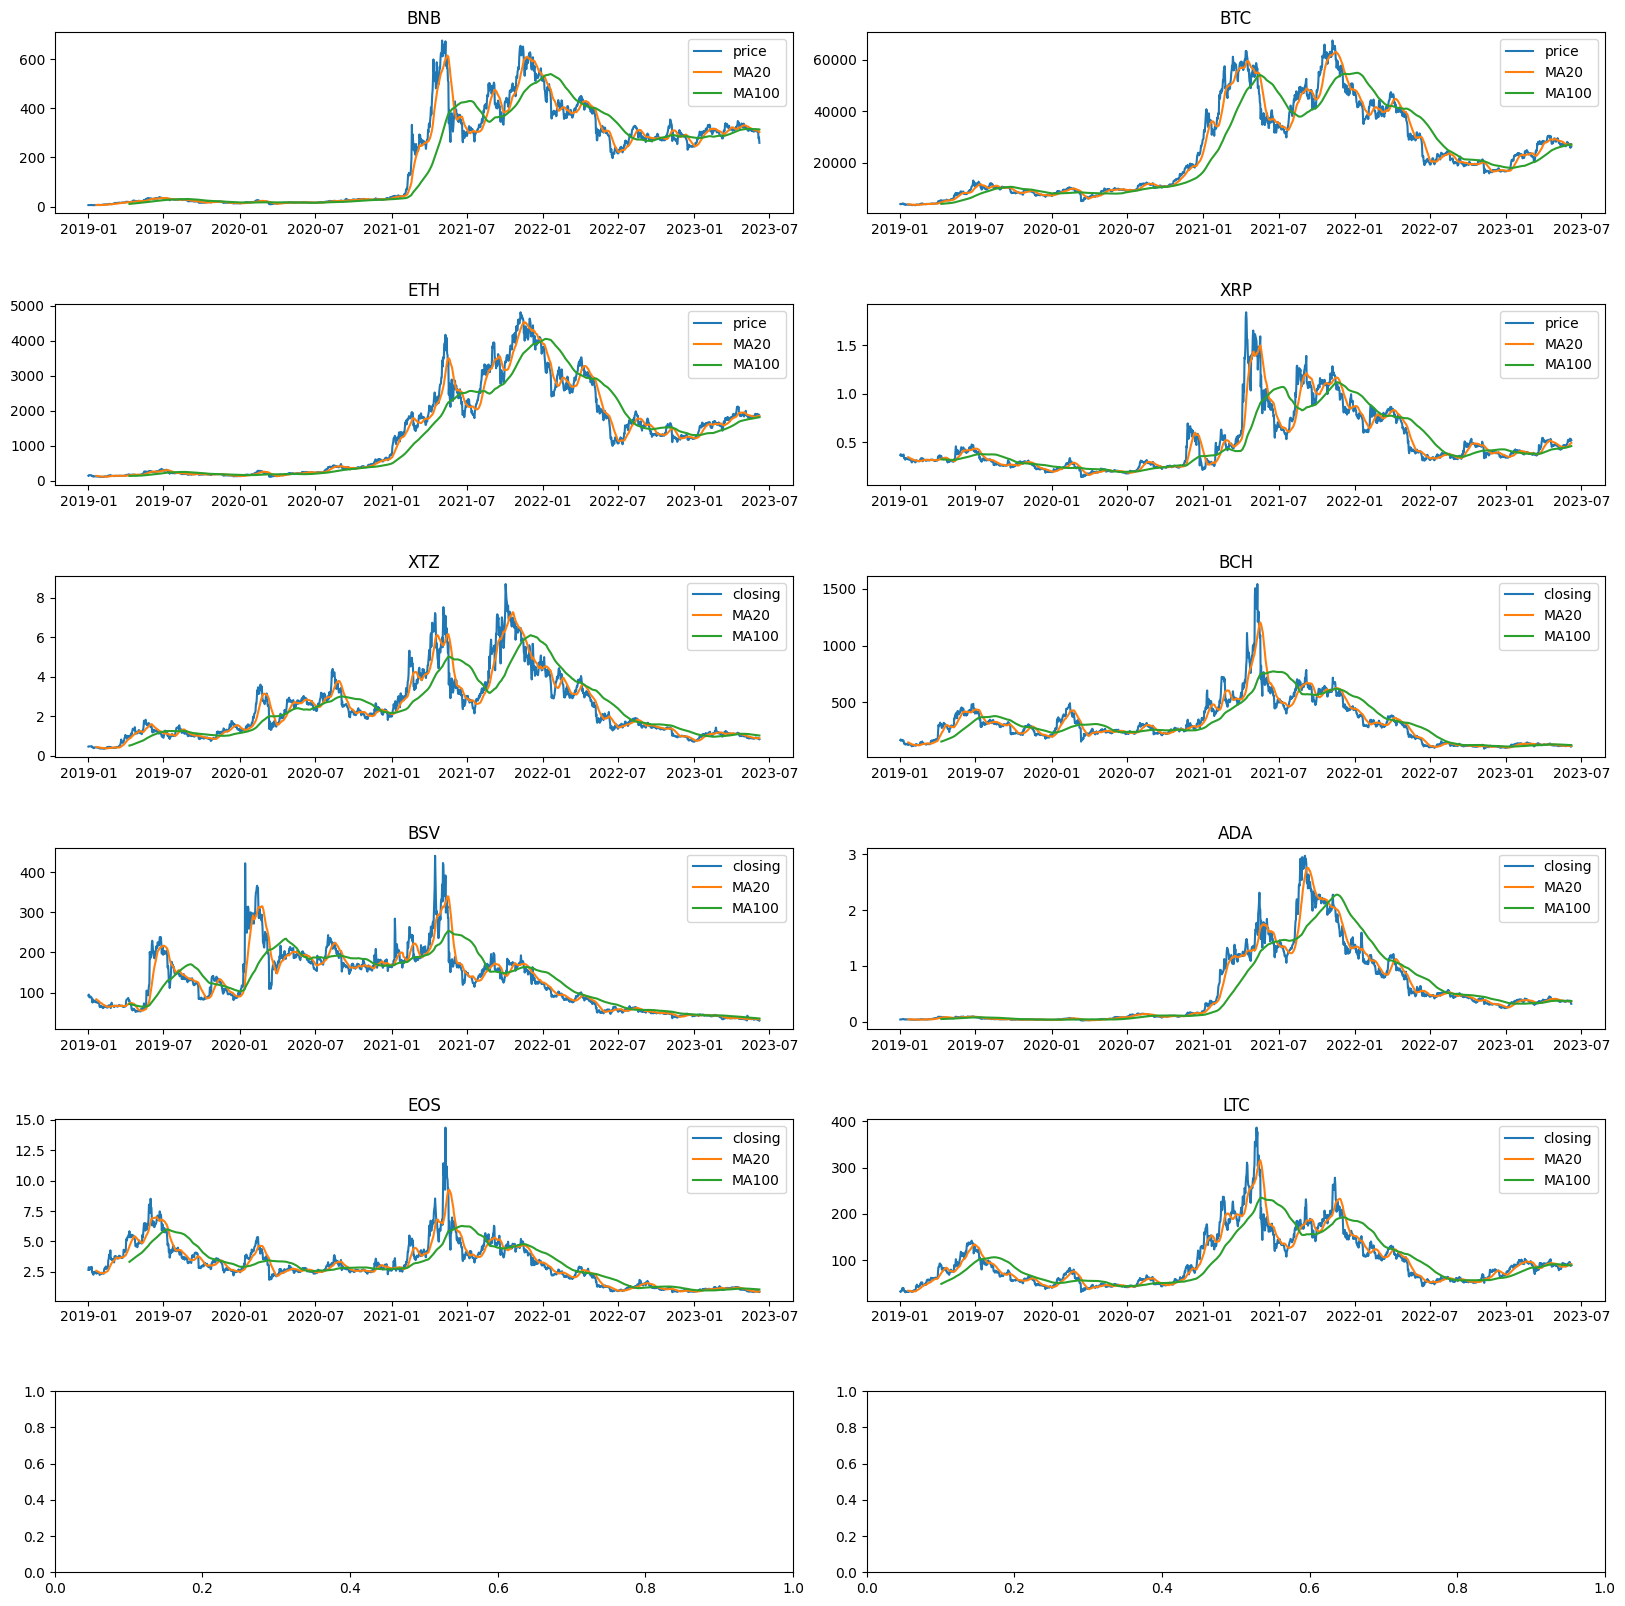

In [19]:
# ploting the 20-day and 100-day moving average
fig, axs = plt.subplots(6,2,figsize=(20,20),gridspec_kw ={'hspace': 0.5, 'wspace': 0.1})

axs[0,0].plot(adj_close['BNB-USD'], label= 'price')
axs[0,0].plot(MA20['BNB-USD'], label= 'MA20')
axs[0,0].plot(MA100['BNB-USD'], label= 'MA100')
axs[0,0].set_title('BNB')
axs[0,0].legend()

axs[0,1].plot(adj_close['BTC-USD'], label= 'price')
axs[0,1].plot(MA20['BTC-USD'], label= 'MA20')
axs[0,1].plot(MA100['BTC-USD'], label= 'MA100')
axs[0,1].set_title('BTC')
axs[0,1].legend()

axs[1,0].plot(adj_close['ETH-USD'], label= 'price')
axs[1,0].plot(MA20['ETH-USD'], label= 'MA20')
axs[1,0].plot(MA100['ETH-USD'], label= 'MA100')
axs[1,0].set_title('ETH')
axs[1,0].legend()

axs[1,1].plot(adj_close['XRP-USD'], label= 'price')
axs[1,1].plot(MA20['XRP-USD'], label= 'MA20')
axs[1,1].plot(MA100['XRP-USD'], label= 'MA100')
axs[1,1].set_title('XRP')
axs[1,1].legend()

axs[2,0].plot(adj_close['XTZ-USD'], label= 'closing')
axs[2,0].plot(MA20['XTZ-USD'], label= 'MA20')
axs[2,0].plot(MA100['XTZ-USD'], label= 'MA100')
axs[2,0].set_title('XTZ')
axs[2,0].legend()


axs[2,1].plot(adj_close['BCH-USD'], label= 'closing')
axs[2,1].plot(MA20['BCH-USD'], label= 'MA20')
axs[2,1].plot(MA100['BCH-USD'], label= 'MA100')
axs[2,1].set_title('BCH')
axs[2,1].legend()

axs[3,0].plot(adj_close['BSV-USD'], label= 'closing')
axs[3,0].plot(MA20['BSV-USD'], label= 'MA20')
axs[3,0].plot(MA100['BSV-USD'], label= 'MA100')
axs[3,0].set_title('BSV')
axs[3,0].legend()

axs[3,1].plot(adj_close['ADA-USD'], label= 'closing')
axs[3,1].plot(MA20['ADA-USD'], label= 'MA20')
axs[3,1].plot(MA100['ADA-USD'], label= 'MA100')
axs[3,1].set_title('ADA')
axs[3,1].legend()

axs[4,0].plot(adj_close['EOS-USD'], label= 'closing')
axs[4,0].plot(MA20['EOS-USD'], label= 'MA20')
axs[4,0].plot(MA100['EOS-USD'], label= 'MA100')
axs[4,0].set_title('EOS')
axs[4,0].legend()

axs[4,1].plot(adj_close['LTC-USD'], label= 'closing')
axs[4,1].plot(MA20['LTC-USD'], label= 'MA20')
axs[4,1].plot(MA100['LTC-USD'], label= 'MA100')
axs[4,1].set_title('LTC')
axs[4,1].legend()


plt.show()

We can observe from the charts that around May of 2021, the 20-day MA crosses below the 100-day MA. It indicates that the trend is shifting **downwards**, and it’s a **sell signal**. Towards August 2021, the 20-day MA crosses above the 100-day MA. It shows that the trend is shifting **upwards**, and it’s a **buy signal**.

Further investigating the charts in detail during 2021 or 2022 separately, which are the years with more fluctuations, can bring interesting insights